In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
import pandas as pd

df = pd.read_csv('/content/sample_data/sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [15]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')
Categorical Columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [16]:
mean = df[num_cols].mean()
median = df[num_cols].median()
mode = df[num_cols].mode().iloc[0]
std = df[num_cols].std()

stats_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Mode": mode,
    "Standard Deviation": std
})

stats_df


,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


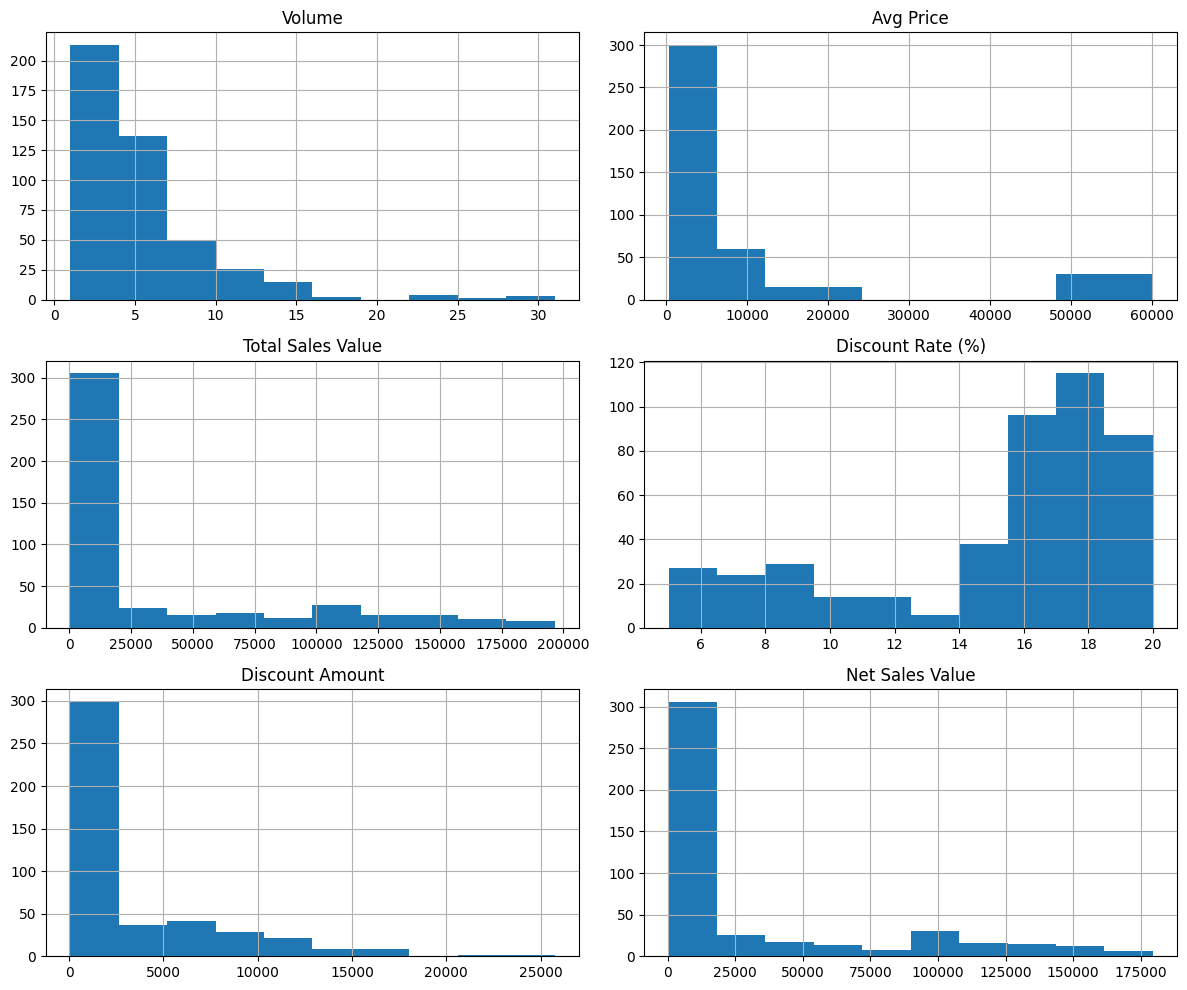

In [17]:
df[num_cols].hist(figsize=(12,10))
plt.tight_layout()
plt.show()


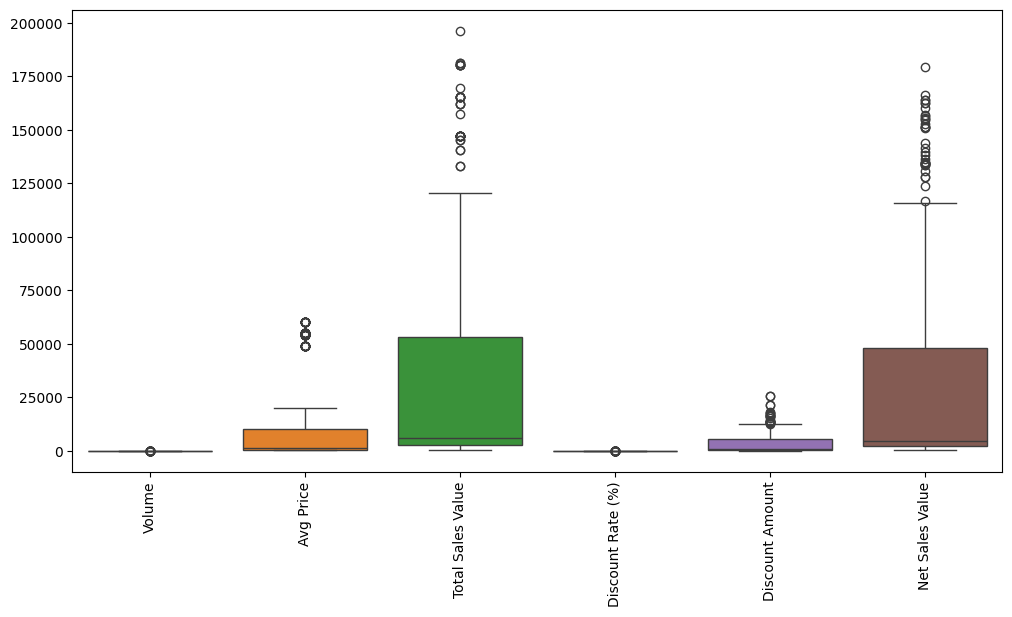

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()


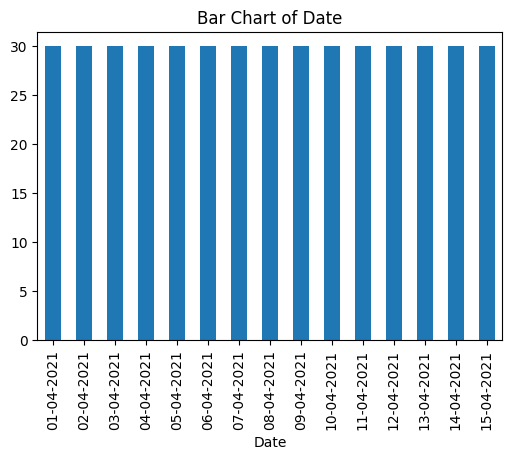

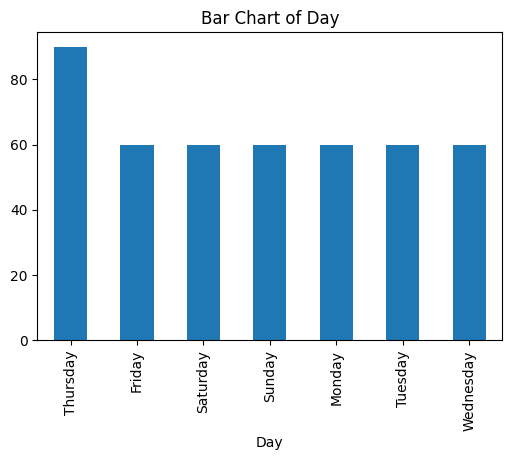

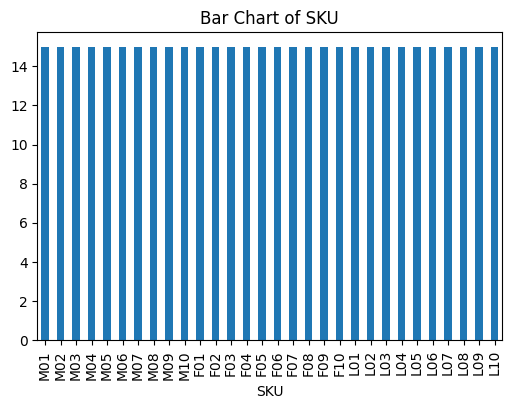

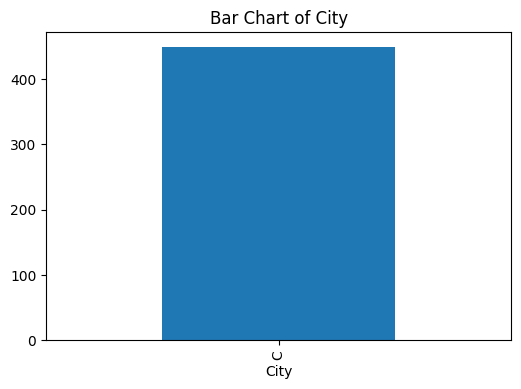

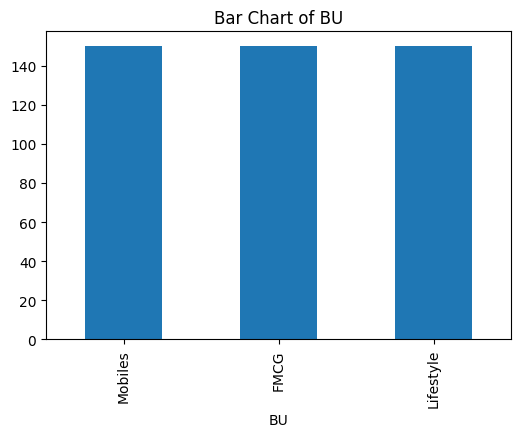

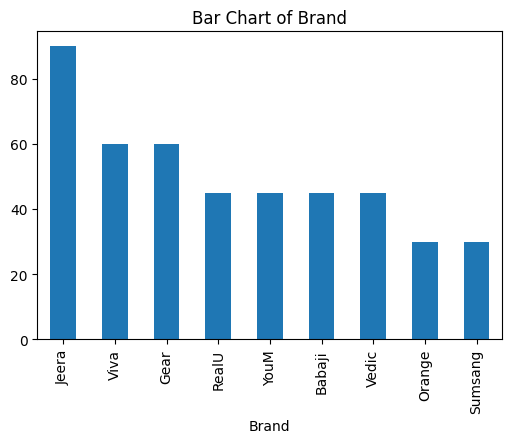

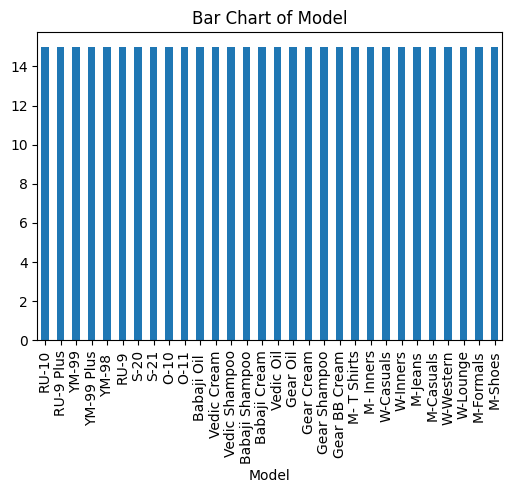

In [19]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.show()


In [20]:
df[num_cols].head()
df_standardized = df.copy()

for col in num_cols:
    df_standardized[col] = (df[col] - df[col].mean()) / df[col].std()

df_standardized[num_cols].head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342


In [21]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
print("Original shape:", df.shape)
print("After Encoding:", df_encoded.shape)


Original shape: (450, 13)
After Encoding: (450, 94)
